In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
s = json.load( open('../fbb_matplotlibrc.json') )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Reading LL84 Data
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
# Reading PLUTO Data to get the number of units
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028F511D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000045FCEA90>]], dtype=object)

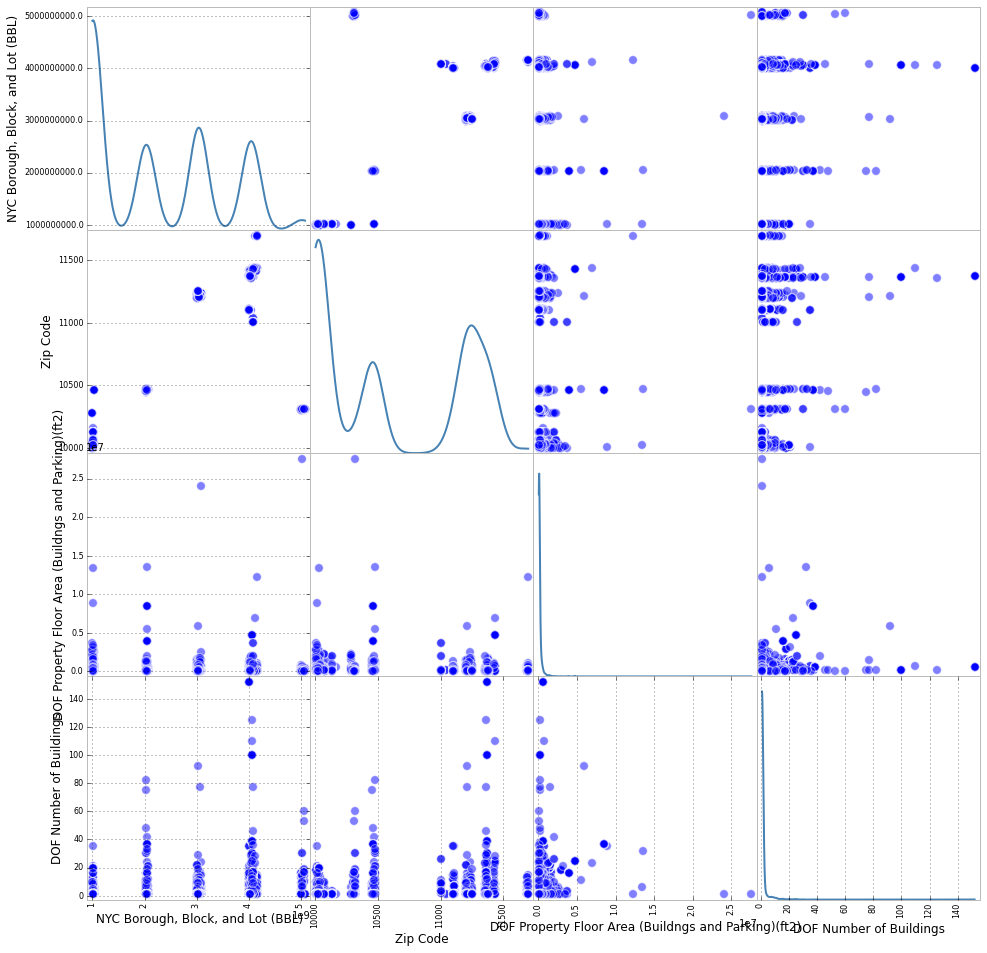

In [4]:
# scatter_matrix will plot each column agains each other
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [5]:
# Function to return true if value is float convertable, otherwise false
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [19]:
# Using our canconvert function set non convartable values to NaN
indxSEUI=(np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])) 
nrg.loc[~indxSEUI, 'Site EUI(kBtu/ft2)'] = float('NaN')

indxFA=( np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
nrg.loc[~indxFA, 'Reported Property Floor Area (Building(s)) (ft²)'] = float('NaN')

In [20]:
# Checking that we can convert to float
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bsize.BBL.astype(float)


Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [21]:
#Merging energy data with building data through BBL
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'] 
bblnrg = pd.merge(nrg, bsize, how='inner', on=['BBL'])
print bblnrg.columns

Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [24]:
# Total Energy
bblnrg['totalNrg'] = bblnrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)*bblnrg['Site EUI(kBtu/ft2)'].astype(float)

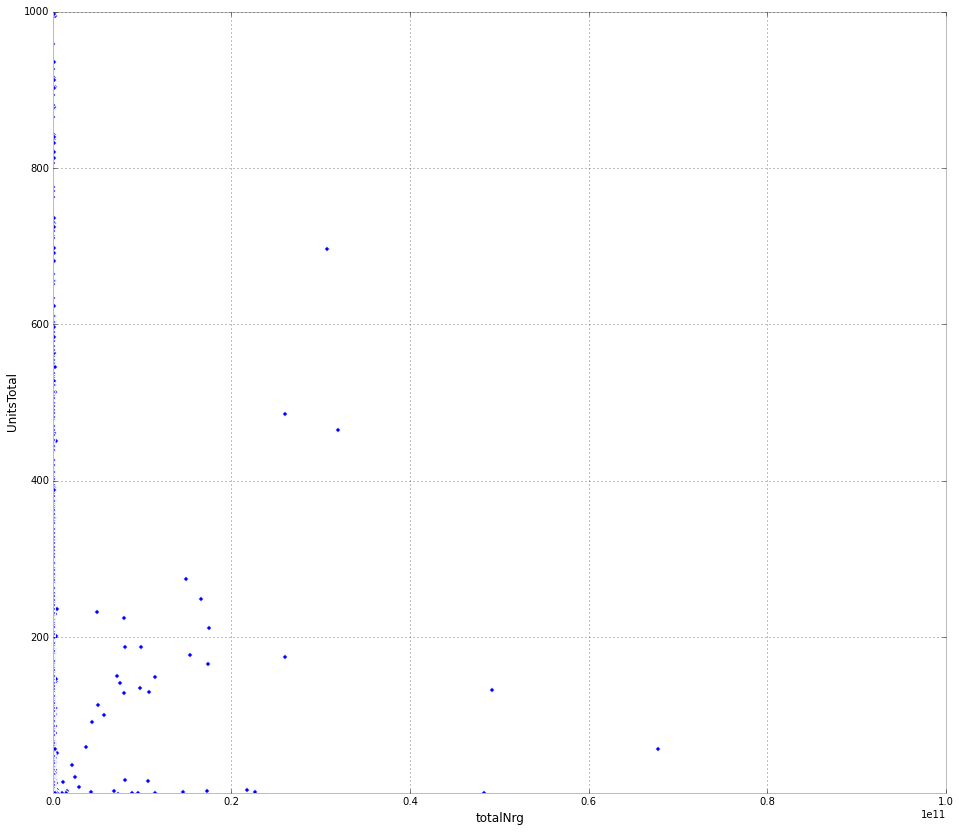

In [29]:
bblnrg.plot(kind='scatter',x='totalNrg',y='UnitsTotal', marker='o', figsize=(16, 14),  xlim=(1000,1e11), ylim=(1,1000))

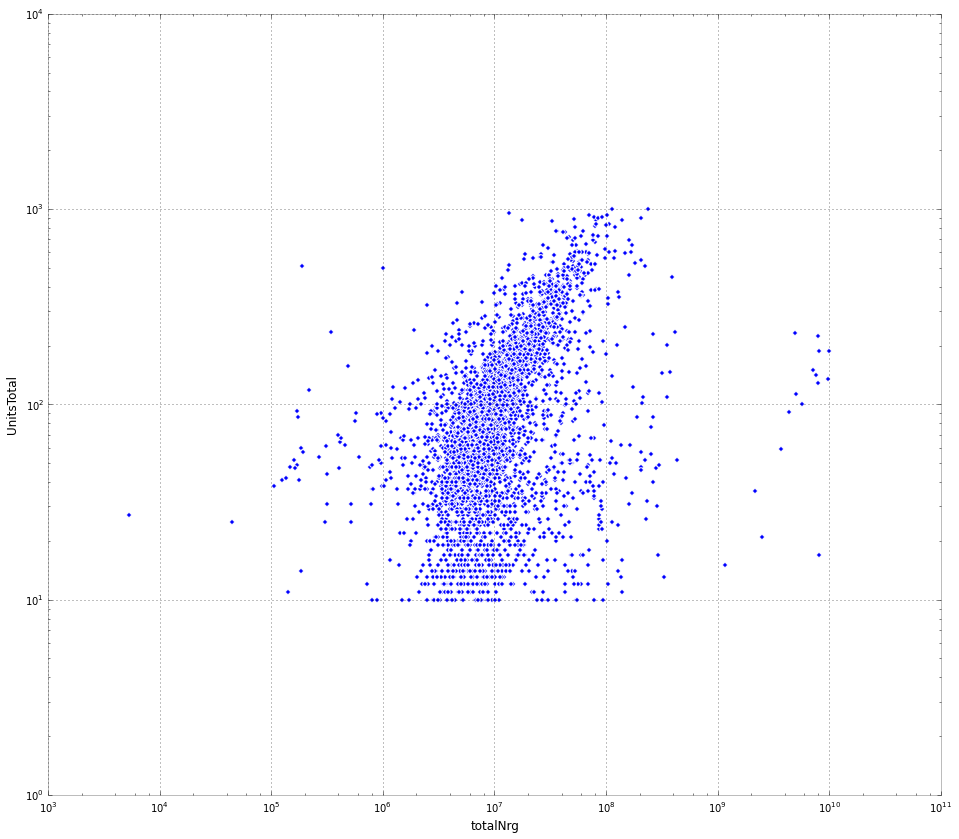

In [164]:
# Subsetting data in interest
bblnrg_cut = bblnrg[(bblnrg.totalNrg > 1000) & (bblnrg.totalNrg < 1e10) & (bblnrg.UnitsTotal>=10) & (bblnrg.UnitsTotal<1000)]

bblnrg_cut.plot(kind='scatter',x='totalNrg',y='UnitsTotal', marker='o',  figsize=(16, 14), loglog=True)

#  Fit for energy vs units

In [105]:
X = sm.add_constant(np.log10(bblnrg_cut.UnitsTotal))
model = sm.OLS(np.log10(bblnrg_cut.totalNrg), X, missing='drop') # ignores entires where x or y is NaN
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:               totalNrg   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     837.0
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          3.70e-168
Time:                        00:50:02   Log-Likelihood:                -2541.4
No. Observations:                4253   AIC:                             5087.
Df Residuals:                    4251   BIC:                             5100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1045      0.033    186.858      0.0

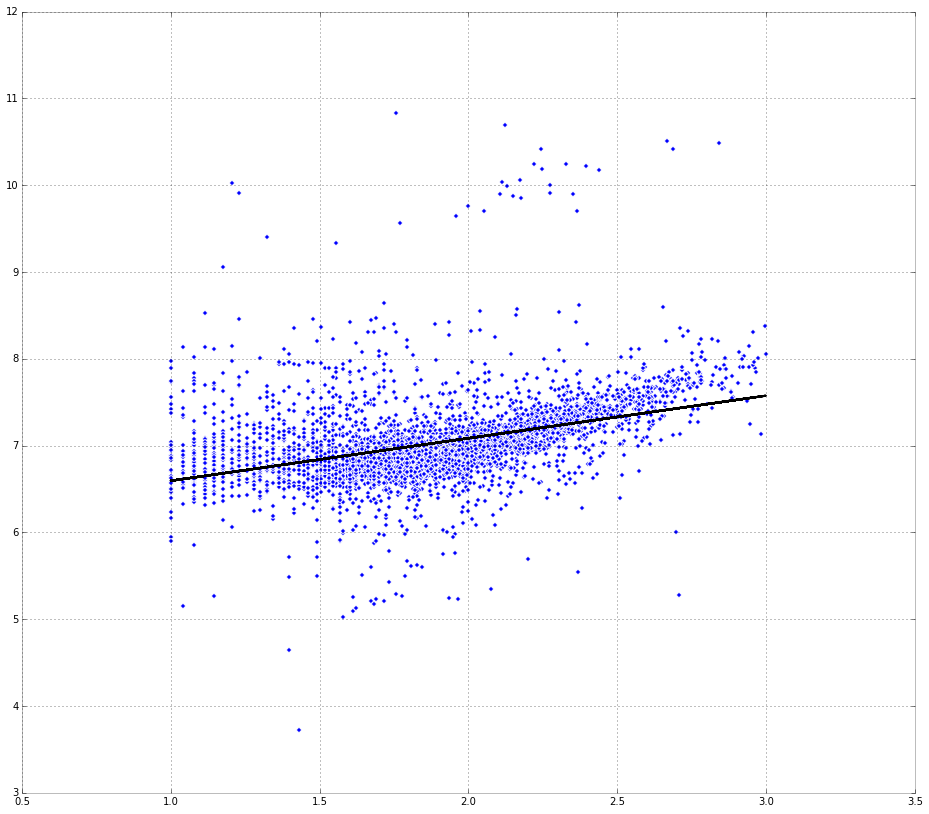

In [106]:
pl.figure(figsize=(16, 14))
pl.scatter(np.log10(bblnrg_cut.UnitsTotal), np.log10(bblnrg_cut.totalNrg))
plot(np.log10(bblnrg_cut.UnitsTotal), fit.predict(), 'k')

# Fit for units vs energy

In [107]:
X2 = sm.add_constant(np.log10(bblnrg_cut.totalNrg))
model2 = sm.OLS(np.log10(bblnrg_cut.UnitsTotal), X2, missing='drop') # ignores entires where x or y is NaN
fit2 = model2.fit()
print fit2.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     837.0
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          3.70e-168
Time:                        00:50:35   Log-Likelihood:                -1734.7
No. Observations:                4253   AIC:                             3473.
Df Residuals:                    4251   BIC:                             3486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4723      0.082     -5.780      0.0

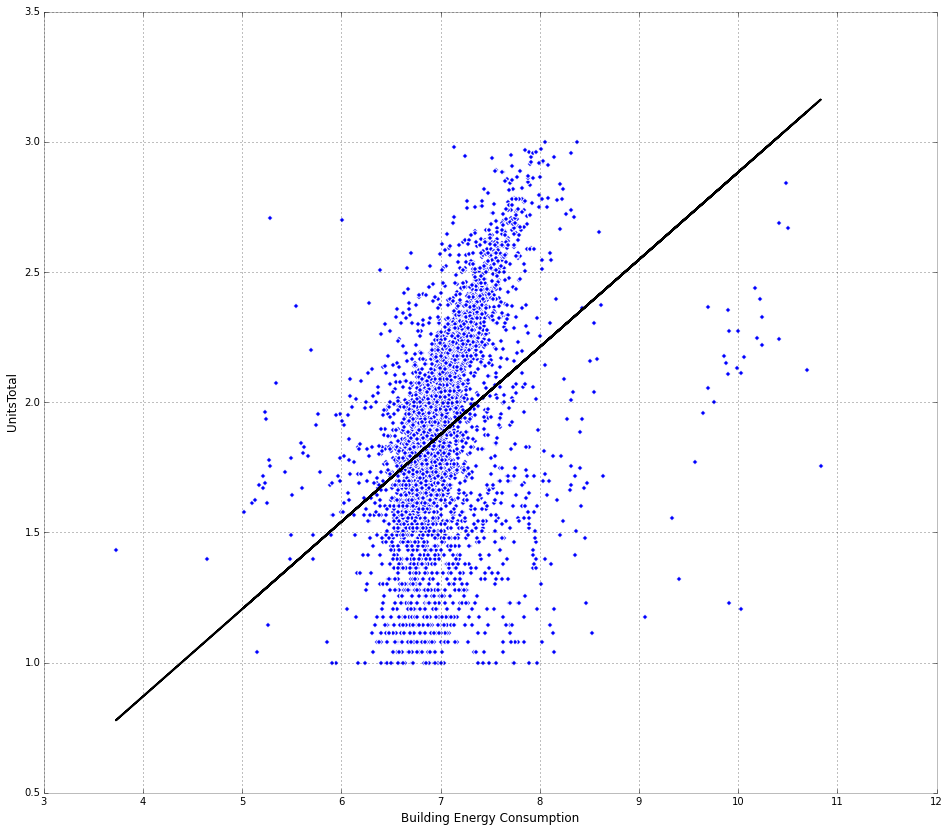

In [127]:
pl.figure(figsize=(16, 14))
pl.scatter(np.log10(bblnrg_cut.totalNrg), np.log10(bblnrg_cut.UnitsTotal))
plot(np.log10(bblnrg_cut.totalNrg), fit2.predict(), 'k')
pl.xlabel('Building Energy Consumption')
pl.ylabel('UnitsTotal')

# Since we are fiting linear regression on same data, we can not say which one is better. 
# R2 value for both models are same 0.165
# We can not do likelihood ratio test here, because our degree of freedom for two models are same. 
# We are using unit, energy only. 

In [53]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/math/2/2/9/229b472081ce3580881cf29b4e376ef3.png')

In [54]:
# Lets fit a second degree curve to it: ax^2+bx+c.

In [110]:
import statsmodels.formula.api as smf

In [158]:
UnitsTotal = np.log10(bblnrg_cut['UnitsTotal'])
totalNrg = np.log10(bblnrg_cut['totalNrg'])
b2, b1, b0 = np.polyfit(UnitsTotal, totalNrg, 2)
print b0, b1, b2

8.09360887621 -1.69906919698 0.575991217208


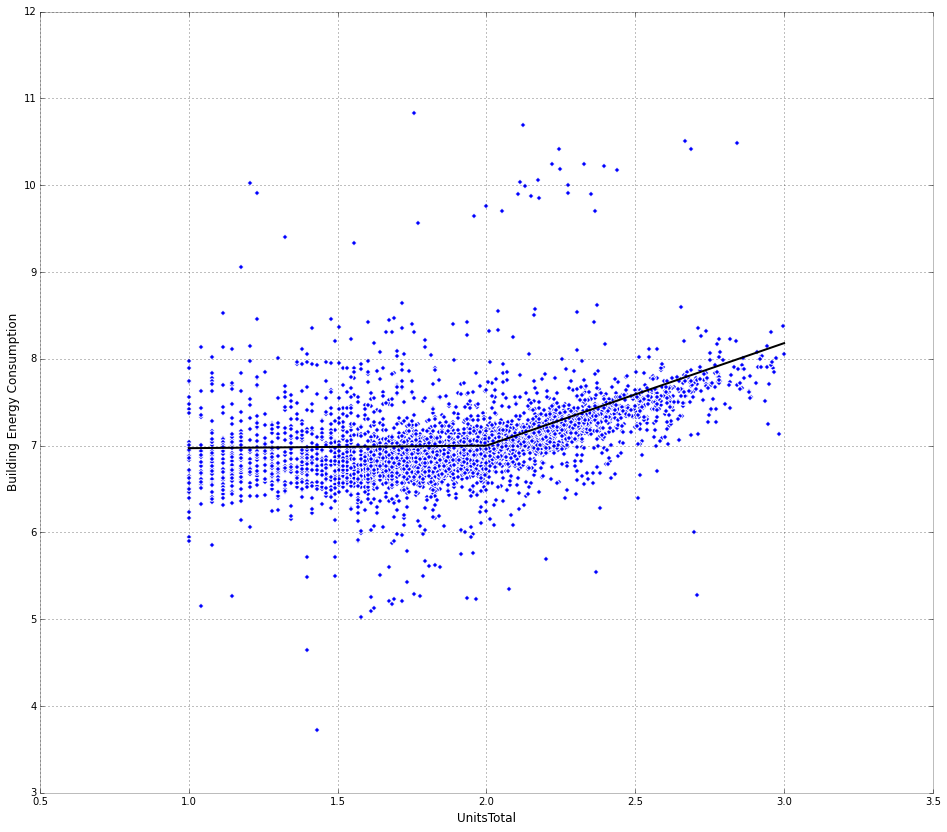

In [159]:
x_dummy = np.arange(1,4)
y_predicted = b2*x_dummy**2 + b1*x_dummy + b0

pl.figure(figsize=(16, 14))
pl.scatter(UnitsTotal,totalNrg)
pl.plot(x_dummy,y_predicted, 'k')
pl.xlabel('UnitsTotal')
pl.ylabel('Building Energy Consumption')

In [160]:
bblnrg_cut['logUnits'] = bblnrg_cut['UnitsTotal'].apply(log10)
bblnrg_cut['logNrg'] = bblnrg_cut['totalNrg'].apply(log10)

model4 = smf.ols(formula='logNrg ~ logUnits + I(logUnits**2)', data = bblnrg_log)
fit4 = model4.fit()
fit4.summary()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logNrg   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     629.1
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          4.69e-240
Time:                        01:12:37   Log-Likelihood:                -2372.2
No. Observations:                4253   AIC:                             4750.
Df Residuals:                    4250   BIC:                             4769.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.0936      0.111     73.208      0.000         7.877     8.310
logUnits            -1.6991      0.118    -14.422      0.000        -1.930    -1.468
I(logUnits ** 2)     0.5760      0.031     18.765      0.000         0.516     0.636
==============================================================================
Omnibus:                     2387.158   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58874.090
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      20.696   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
b0 = fit4.params[0]
b1 = fit4.params[1]
b2 = fit4.params[2]
print b0, b1, b2

8.09360887621 -1.69906919698 0.575991217208


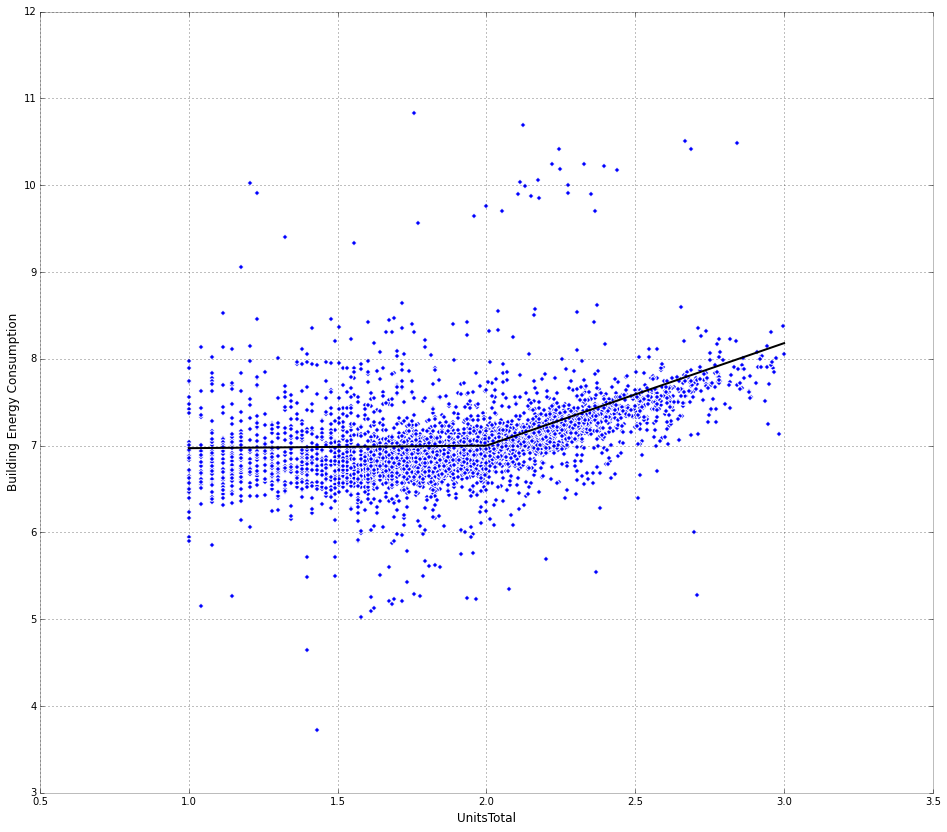

In [162]:
x_dummy = np.arange(1,4)
y_predicted = b2*x_dummy**2 + b1*x_dummy + b0

pl.figure(figsize=(16, 14))
pl.scatter(bblnrg_cut['logUnits'],bblnrg_cut['logNrg'])
pl.plot(x_dummy,y_predicted, 'k')
pl.xlabel('UnitsTotal')
pl.ylabel('Building Energy Consumption')

# Our linear model's R2 is 0.165 and Second degree curve model's R2 is 0.228
# Hence curve model  better.

# Since we have degree of freedoms for the linear and curve model are 1 and 2,
# We can do likelihood ratio test